<h3>PCA on doc2vec</h3>

In [3]:
import pickle
import numpy as np
import pandas as pd
#from gensim.models.doc2vec import Doc2Vec
from sklearn.decomposition import PCA
#from sklearn.manifold import TSNE
#from gensim.models import Doc2Vec
#from sqlalchemy import create_engine
#from sqlalchemy_utils import database_exists, create_database
#import psycopg2


In [4]:
dfS_raw = pd.read_csv('d2v_array_nostem.csv',index_col='level_0')

print('d2v array loaded')

with open('startup_sentence_bool.pkl','rb') as f:
    startup_sentence_bool = pickle.load(f)

# grab smaller array...
dfS_raw = dfS_raw[startup_sentence_bool]
d2v_array = dfS_raw[dfS_raw.columns[8:]].as_matrix()

# dimensionality reduction
svd = PCA()
svd_transform = svd.fit_transform(d2v_array)
svd_covariance = svd.get_covariance()

d2v array loaded


In [6]:
svd_transform.shape

(95631, 92)

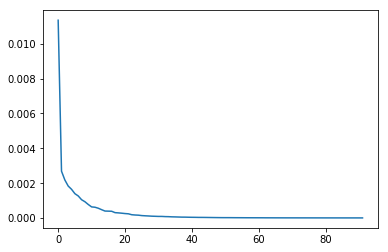

In [9]:
from matplotlib import pyplot as plt

plt.figure();
plt.plot(svd.explained_variance_)
plt.show()

<h3>Save the first ~20 components as features</h3>

In [ ]:
from bhtsne import tsne

X = svd_transform[:,0:10]
d2v_tsne = tsne(X)

#tsne_model = TSNE(n_components=2, verbose=1, random_state=0, method='exact')
#d2v_tsne = tsne_model.fit_transform(X)

In [14]:
X

array([[ 0.01438293, -0.0006965 ,  0.02341549, ..., -0.00791552,
         0.00193586, -0.0020166 ],
       [-0.18164579,  0.0909568 ,  0.10127731, ..., -0.02128773,
         0.03614238, -0.06603926],
       [-0.13525227, -0.0020037 , -0.01084557, ...,  0.03822326,
        -0.00069419,  0.00396056],
       ..., 
       [ 0.03300583, -0.02258857,  0.00394907, ..., -0.001831  ,
        -0.02932883,  0.02671359],
       [ 0.07148994,  0.0076044 , -0.00481205, ..., -0.00039351,
        -0.00754968,  0.00290538],
       [ 0.07295971,  0.05795162,  0.00897265, ...,  0.00482203,
        -0.00777746,  0.01047334]])

In [15]:
d2v_array

array([[ -1.10857533e-02,  -1.27997659e-02,   5.51756145e-03, ...,
         -1.68262534e-02,  -4.33239853e-03,  -3.27521004e-03],
       [  1.52469129e-05,   4.25514914e-02,  -5.63123859e-02, ...,
         -1.60342213e-02,  -1.10026440e-02,  -4.97857928e-02],
       [ -7.03018438e-03,   6.72805589e-04,   7.63073890e-03, ...,
         -8.74582771e-03,  -2.68143509e-03,   2.34493017e-02],
       ..., 
       [ -3.08697089e-03,  -1.02080489e-02,   4.19286126e-03, ...,
         -7.62403663e-03,  -1.45771094e-02,   1.88700911e-02],
       [ -1.18870186e-02,  -2.45636608e-02,   9.34528094e-03, ...,
         -1.53759876e-02,  -2.49823276e-02,   3.88881471e-03],
       [ -6.40627043e-03,  -2.09177658e-02,   2.66766455e-02, ...,
         -1.01689864e-02,  -1.42086810e-02,  -4.61672340e-03]])